# Libraries

In [5]:

import matplotlib.pyplot as plt
# Do you want plot with latex font format? Use the cell bellow:
import matplotlib as mpl
mpl.rcParams.update({
                        'font.family': 'serif',
                        'mathtext.fontset': 'cm',
                        'axes.unicode_minus': False
                    })
import numpy as np
import pandas as pd
import seaborn as sns


# Dataset upload or create

For simplicity we use a random variable concept to create a dataset.

In [6]:
x = np.random.normal(5, 2, 10000)
y = np.random.gumbel(5, 2, 10000)
data = {
            'x': x,
            'y': y
        }
data = pd.DataFrame(data)


### For obtaining cdf

In [7]:
def obtain_cdf(x: list) -> tuple[list, list]:
    """
    Obtain the cumulative distribution function (CDF) of a list of values.

    :param x: values
    :return: [0] = sorted values, [1] = CDF of the input values
    """
    
    x_sorted = np.sort(x)
    x_cdf = np.arange(1, len(x_sorted) + 1) / len(x_sorted)

    return list(x_sorted), list(x_cdf)

data_for_CDF = data['x'].tolist()
x_cdf, y_cdf = obtain_cdf(data_for_CDF)


# Chart

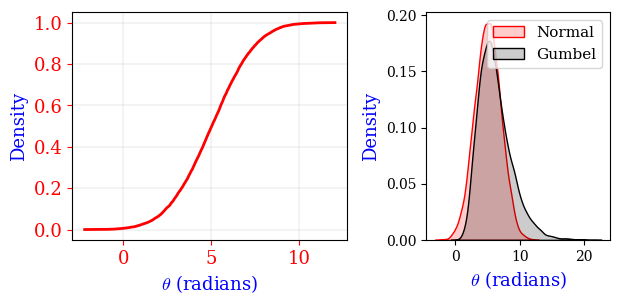

In [8]:
### Figure name and DPI
dpi = 600               # Change as you wish
name = 'cdf_with_kde' # Change as you wish

### Chart dimensions (in centimeters)
b_cm = 16                       # Change as you wish
h_cm = 8                        # Change as you wish
inches_to_cm = 1 / 2.54
b_input = b_cm * inches_to_cm
h_input = h_cm * inches_to_cm

label_y = 'Density'
label_x = '$\\theta$ (radians)' # Change as you wish
size_label = 13                 # Change as you wish
color_label = 'blue'            # or hexadecimal. Change as you wish
size_axis = 13                  # Change as you wish
color_axis = 'red'              # or hexadecimal. Change as you wish
line_width = 2

### Color
color = ['red', 'black', 'blue']                 # Change as you wish
labels_legend = ['Normal', 'Gumbel']    # Change as you wish
size_legend = 11                        # Change as you wish
location_legend = 'upper right'        # Change as you wish - 'best' look up by the best fit

### Marker
size_marker = 0                  # Change as you wish
marker_style = 'o'               # Change as you wish

### figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(b_input, h_input), gridspec_kw={'width_ratios': [3, 2]})


### Title. Do you need a title? Use the cell bellow:
# ax.set_title('bar histogram', fontsize=16)

### Cdf config
ax_cdf = axes[0]
### Config axis
ax_cdf.tick_params(axis='both', which='major', labelsize=size_axis, colors=color_axis)
ax_cdf.set_xlabel(label_x, fontsize=size_label, color=color_label)
ax_cdf.set_ylabel(label_y, fontsize=size_label, color=color_label)
### Config grid
on_or_off = True
ax_cdf.grid(on_or_off, which='both', linestyle='-', linewidth=0.2)
##3 Plot data here:
ax_cdf.plot(x_cdf, y_cdf, color=color[0], linewidth = line_width, marker=marker_style, markersize=size_marker, markerfacecolor=color[1], markeredgecolor=color[2])

### Kde config
### Plot data'Densidade'
ax_kde = axes[1]
sns.kdeplot(data=data, x='x', fill=True, alpha=0.2, ax=ax_kde, label=labels_legend[0], color=color[0])
sns.kdeplot(data=data, x='y', fill=True, alpha=0.2, ax=ax_kde, label=labels_legend[1], color=color[1])
ax_kde.set_xlabel(label_x, fontsize=size_label, color=color_label)
ax_kde.set_ylabel(label_y, fontsize=size_label, color=color_label)
ax_kde.legend(fontsize=size_legend, loc=location_legend)

plt.tight_layout()
### Save. Do you need save? Use the cell bellow:
fig.savefig('Traditional-cdf-with-kde.png', dpi=dpi, bbox_inches='tight')
plt.show()
